In [1]:
import cv2
import numpy as np

In [2]:
import copy

# 포인터를 공유 -> malloc을 통해 해결(C, C++ 관점)
# 객체를 공유 -> new를 통해 해결(자바 관점)
# 파이썬에서 위의 역할을 해주는 것이 copy.deepcopy()
def filter_2d(input_img, kernel):
    input_img = copy.deepcopy(input_img)
    output_img = copy.deepcopy(input_img)
    
    #print('input_img.shape[0]:', input_img.shape[0])
    #print('input_img.shape[1]:', input_img.shape[1])
    
    #for i in range(input_img.shape[0]):
    #    print(input_img[i])
        
    # 컨벌루션 연산이 적용되는 대상은 무엇인가 ? 답: 이미지
    # 이미지 -> (다차원)행렬
    for row in range(input_img.shape[0]):
        output_img[row][0] = input_img[row][1] * kernel[0] + \
                        input_img[row][0] * kernel[1] + \
                        input_img[row][1] * kernel[2]
        
        for col in range(1, input_img.shape[1] - 1):
            output_img[row][col] = input_img[row][col - 1] * kernel[0] + \
                        input_img[row][col] * kernel[1] + \
                        input_img[row][col + 1] * kernel[2]
            
        output_img[row][input_img.shape[1] - 1] = \
            input_img[row][input_img.shape[1] - 2] * kernel[0] + \
            input_img[row][input_img.shape[1] - 1] * kernel[1] + \
            input_img[row][input_img.shape[1] - 2] * kernel[2]
            
    return output_img.T

In [3]:
# 윈도우 = keras 앞부분에 tensorflow를 붙여줘야한다.
# 우분투 = 앞에 붙일 필요 없이 keras만 작성해도 된다.
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [4]:
classifier = VGG16()

In [5]:
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# 내 생각으로 는 이미지 로드 부분 ↓ 에서 flask를 써야 할것 같다.

In [7]:
# 이미지를 로드 해주는데 크기값을 (224, 224)라고 알려주면서 로드한다.
testImg = image.load_img("test.jpg", target_size=(224, 224))

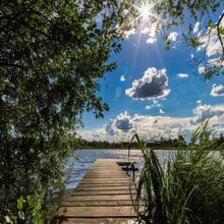

In [8]:
test_img = image.load_img("test.jpg", target_size = (224, 224))
test_img

In [9]:
trans_img = image.img_to_array(test_img)
print(trans_img.shape)

(224, 224, 3)


In [10]:
trans_img = np.expand_dims(trans_img, axis = 0)
print(trans_img.shape)

(1, 224, 224, 3)


In [11]:
trans_img = preprocess_input(trans_img)
print(trans_img.shape)

(1, 224, 224, 3)


In [12]:
trans_img = preprocess_input(trans_img)
print(trans_img.shape)

(1, 224, 224, 3)


In [13]:
pred = classifier.predict(trans_img)

In [14]:
# 라플라스 변환을 하면 s-domain이라는 평면으로 이동을 하게 되고
# 라플라스 역변환을 하면 time-domaim(시간축)으로 돌아오게 된다.
from keras.applications.vgg16 import decode_predictions

# 역으로 변환을 해서 이것이 뭉엇인지를 판정할 수 있게 도와준다.
# 최대값 5개를 뽑으세요 ~
decode_predictions(pred, top = 5)

[[('n03891251', 'park_bench', 0.53066677),
  ('n03930313', 'picket_fence', 0.06375953),
  ('n03388043', 'fountain', 0.053541493),
  ('n02788148', 'bannister', 0.05214134),
  ('n03457902', 'greenhouse', 0.028706456)]]

In [15]:
label = decode_predictions(pred)

print('top 5!')

for i in range(5):
    print('%16s (%.2f%%)' % (label[0][i][1], label[0][i][2] * 100))

top 5!
      park_bench (53.07%)
    picket_fence (6.38%)
        fountain (5.35%)
       bannister (5.21%)
      greenhouse (2.87%)
